In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker, cm, colors
import matplotlib.gridspec as gridspec

import seaborn as sns
from ydata_profiling import ProfileReport

from scipy.stats import multivariate_normal

from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

##from keras import layers, models, regularizers, optimizers, losses, metrics
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, Embedding, Dropout, GlobalAveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.callbacks import Callback, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K


ModuleNotFoundError: No module named 'keras'

In [5]:
data = pd.read_csv('stocks.csv')


# EDA

In [6]:
 data.head(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


In [7]:
data['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [9]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [10]:
 data.shape

(248, 8)

In [11]:
 data.dtypes

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
 data.describe

<bound method NDFrame.describe of     Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  6412

In [13]:
data.isnull().any()

Ticker       False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [14]:
data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
data.select_dtypes(include=[np.number]).corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999626,0.999650,0.999176,0.999173,-0.547741
High,0.999626,1.000000,0.999654,0.999644,0.999640,-0.546175
Low,0.999650,0.999654,1.000000,0.999663,0.999661,-0.544590
Close,0.999176,0.999644,0.999663,1.000000,0.999999,-0.544194
Adj Close,0.999173,0.999640,0.999661,0.999999,1.000000,-0.544370
Volume,-0.547741,-0.546175,-0.544590,-0.544194,-0.544370,1.000000


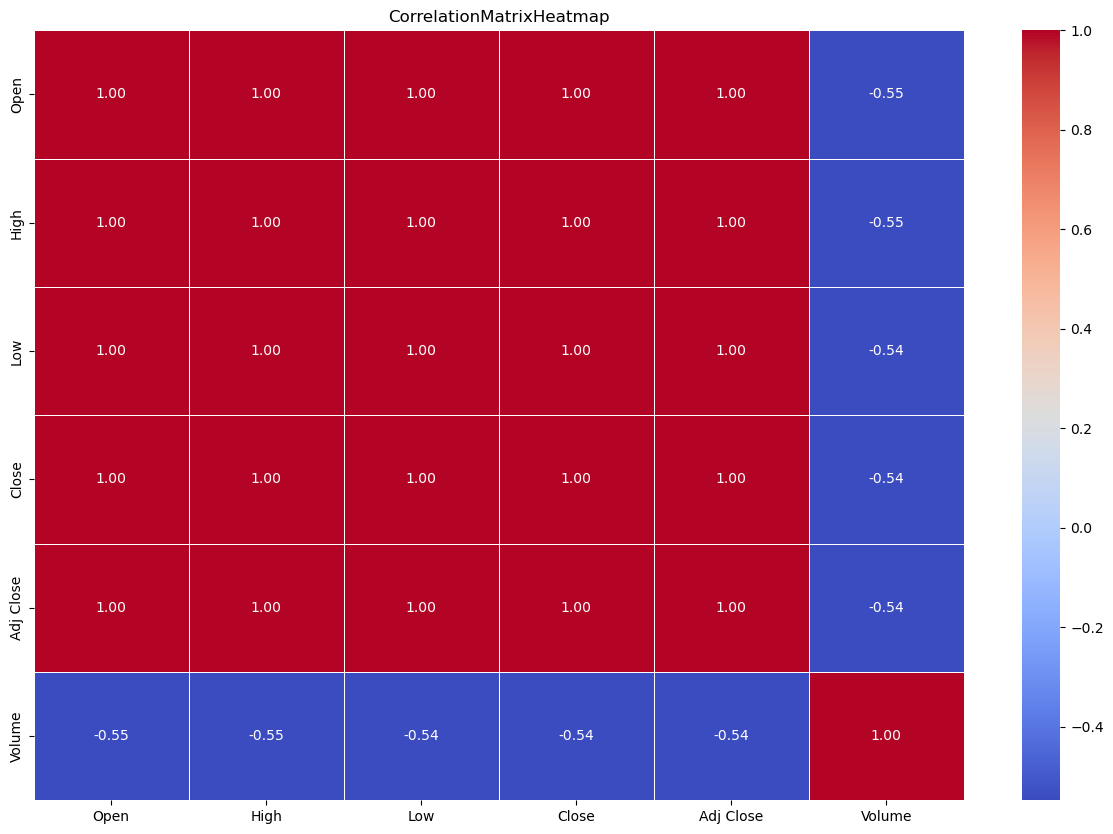

In [16]:
 correlation_matrix=data.select_dtypes(include=[np.number]).corr()
 plt.figure(figsize=(15,10))
 sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
 plt.title("CorrelationMatrixHeatmap")
 plt.show()

In [17]:
 profile= ProfileReport(data, title="Stock Market Analysis")

In [18]:
 profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 34.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
 data['Date'] = pd.to_datetime(data['Date'])

# DATA VISUALIZATIONS

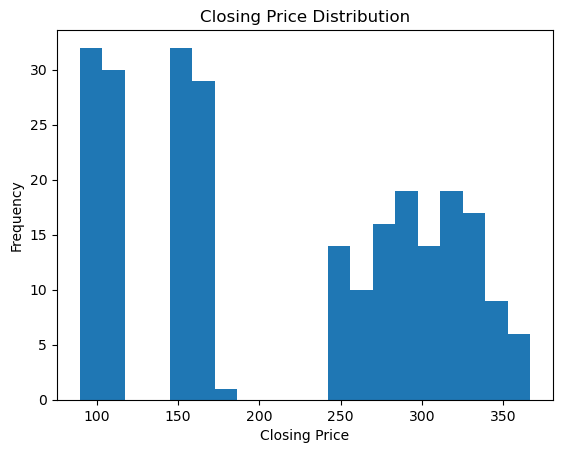

In [21]:
 # the distribution of the closing prices to understand their range and frequency.
 plt.hist(data['Close'], bins=20)
 plt.xlabel('Closing Price')
 plt.ylabel('Frequency')
 plt.title('Closing Price Distribution')
 plt.show()


Text(0.5, 1.0, 'Total Volume by Ticker')

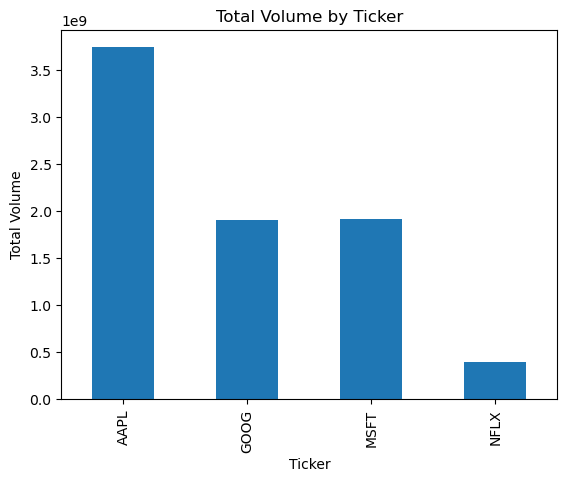

In [24]:
#the cumulative volume traded over time to observe any trends or spikes.
ticker_volume = data.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')

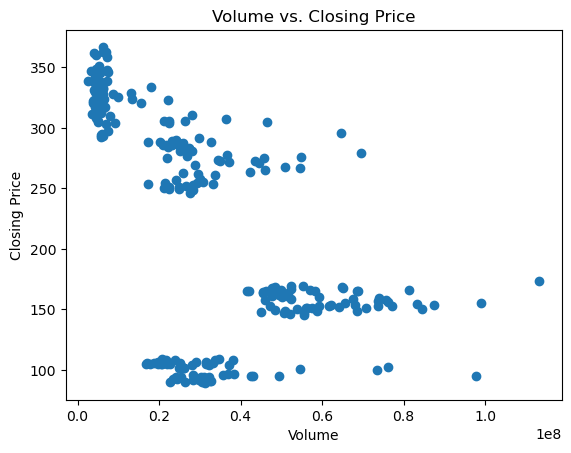

In [28]:
 #Exploring the relationship between volume and closing prices, to identify any correlations.
 plt.scatter(data['Volume'], data['Close'])
 plt.xlabel('Volume')
 plt.ylabel('Closing Price')
 plt.title('Volume vs. Closing Price')
 plt.show()

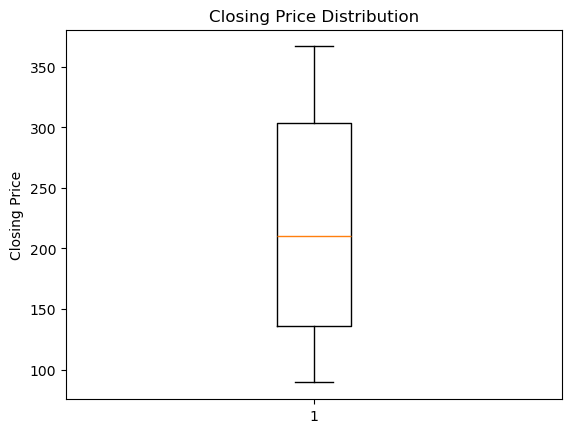

In [30]:
 #Illustrating the distribution of the closing prices, includingthe median, quartiles, and outliers.
 plt.boxplot(data['Close'])
 plt.ylabel('Closing Price')
 plt.title('Closing Price Distribution')
 plt.show()

In [31]:
 data.head(5)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
